# The effects of ESG scores on improving the performance of Goodwill towards an ethical and sustainable market position

**``Research question:``** How do ESG scores influence the valuation of companies' goodwill, and to what extent can better ESG performance improve companies' market position through ethical business practices?

**``Objective:``** To study in depth the relationship between ESG scores and goodwill valuation to improve their market position through ethical business activities.

**``Hypotheses :``**
H1: Higher ESG scores are positively associated with the valuation of goodwill.

H2: The environmental, social and governance components of ESG scores are each positively associated with the valuation of goodwill.

H3: Better ESG performance improves the market position of companies.

## Research methodology

### Choice of variables

The aim of this study is to understand how environmental, social and governance scores in order to boost the performance of Godwill. Achieve such an objective of conducting a study by the quantitative approach because our study variables can be measured by numbers. 

Thus, the study of the relationship between goodwill and ESG scores finally imposed variables such as the target variable or the explained variable, explanatory variables and finally control variables.
By following how the variables will be found by calculation and the source of the data, I want you to create a dummy database corresponding to the information sent. I want the python code

#### Target variable:

- **``Goodwill:``** This variable measures the fair value of the identifiable net assets of the acquired companies. Goodwill is calculated from companies' financial statements and reflects the premium paid above the fair value of identifiable assets, thereby representing the added value associated with intangibles such as reputation and customer loyalty.

#### Independent variables:

- **``ESG Score:``** ESG scores provided by Thomson Reuters' ASSET 4 provide an in-depth assessment of companies' environmental, social and governance standards. These scores are essential for measuring a company's commitment to ethical and sustainable business practices.

- **``Total assets (LOG TA):``** Calculated as the natural logarithm of total assets, this variable makes it possible to control the size of the company. As an independent variable, it helps to understand how the size of the company influences the valuation of goodwill.

#### Control variables:
- **``Asset Turnover:``** Measured as net profit divided by shareholders' equity, this variable indicates the return on equity and helps assess the operational efficiency of the company.

- **``Annual Fixed Effects:``** Dummy variables corresponding to each year in the dataset are included to control for trends and temporal effects over the study period.

### Data collection and samples

The London Stock Exchange Group (LSEG) database, formerly Reinitiv, is the source of the data used in this study. A large amount of financial and ESG data on publicly traded companies is available in the LSEG database. It is therefore an appropriate resource for this type of research. Rather, it is archival research because the data collection process involves accessing existing data in this database. 

ESG scores for 2024 are not included in the dataset because they were not available at the time of data collection. However, the dataset covers the years 2004 to 2023, which is a broad time frame that helps provide a detailed examination of patterns and trends over a 20-year period.

### Data analysis tool
Python is the ideal tool for analyzing the relationship between ESG scores and goodwill valuation due to its vast array of statistical and data science libraries. Libraries such as pandas for data manipulation, numpy for numerical calculations, scikit-learn for machine learning, statsmodels for advanced statistics and regression, and seaborn and matplotlib for data visualization, allow you to perform a comprehensive and sophisticated analysis. These tools are crucial for performing rigorous statistical analyzes and obtaining clear and informative visualizations, essential for interpreting and communicating your results effectively.

## Importing analysis libraries

In [2]:
# Importation des librairies
import pandas as pd
import missingno as msno
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Importing the database

In [3]:
# Importation de la base de données
esgdata = pd.read_csv(r'c:\Users\ARMIDE Informatique\Downloads\goodwill-esg_data.csv')

# affichage de la base de données
esgdata

,Goodwill,ESG_Score,Log_Asset_Total,Asset_Turnover
0,8.289159,12.517988,10.901902,0.953018
1,6.459511,98.561084,16.220192,1.575731
2,8.448502,5.426412,17.308295,1.261057
3,7.899122,91.614061,14.063084,1.272250
4,9.400516,92.213602,11.128998,1.597204
...,...,...,...,...
995,6.141629,32.881916,11.188942,1.152433
996,3.842718,88.507048,16.324764,0.565057
997,8.601473,24.247090,14.568046,0.906424
998,9.239264,75.758883,15.044248,1.599992


## Exploratory data analysis (EDA)

This stage of our data analysis consists of ensuring the quality of our database before starting visualizations and statistical modeling. First, the data preparation phase is a crucial step to check for missing values, duplicates and outliers in our dataset. 

Next, a descriptive statistic to get the first views of our dataset. The exploratory data analysis will conclude with data visualization which will take into account visualizations of the correlation matrix, scatterplots and regression lines of the variables and finally a complete visualization of the data.

### Preparing our dataset

- #### **``Checking of missing data``**

<Axes: >

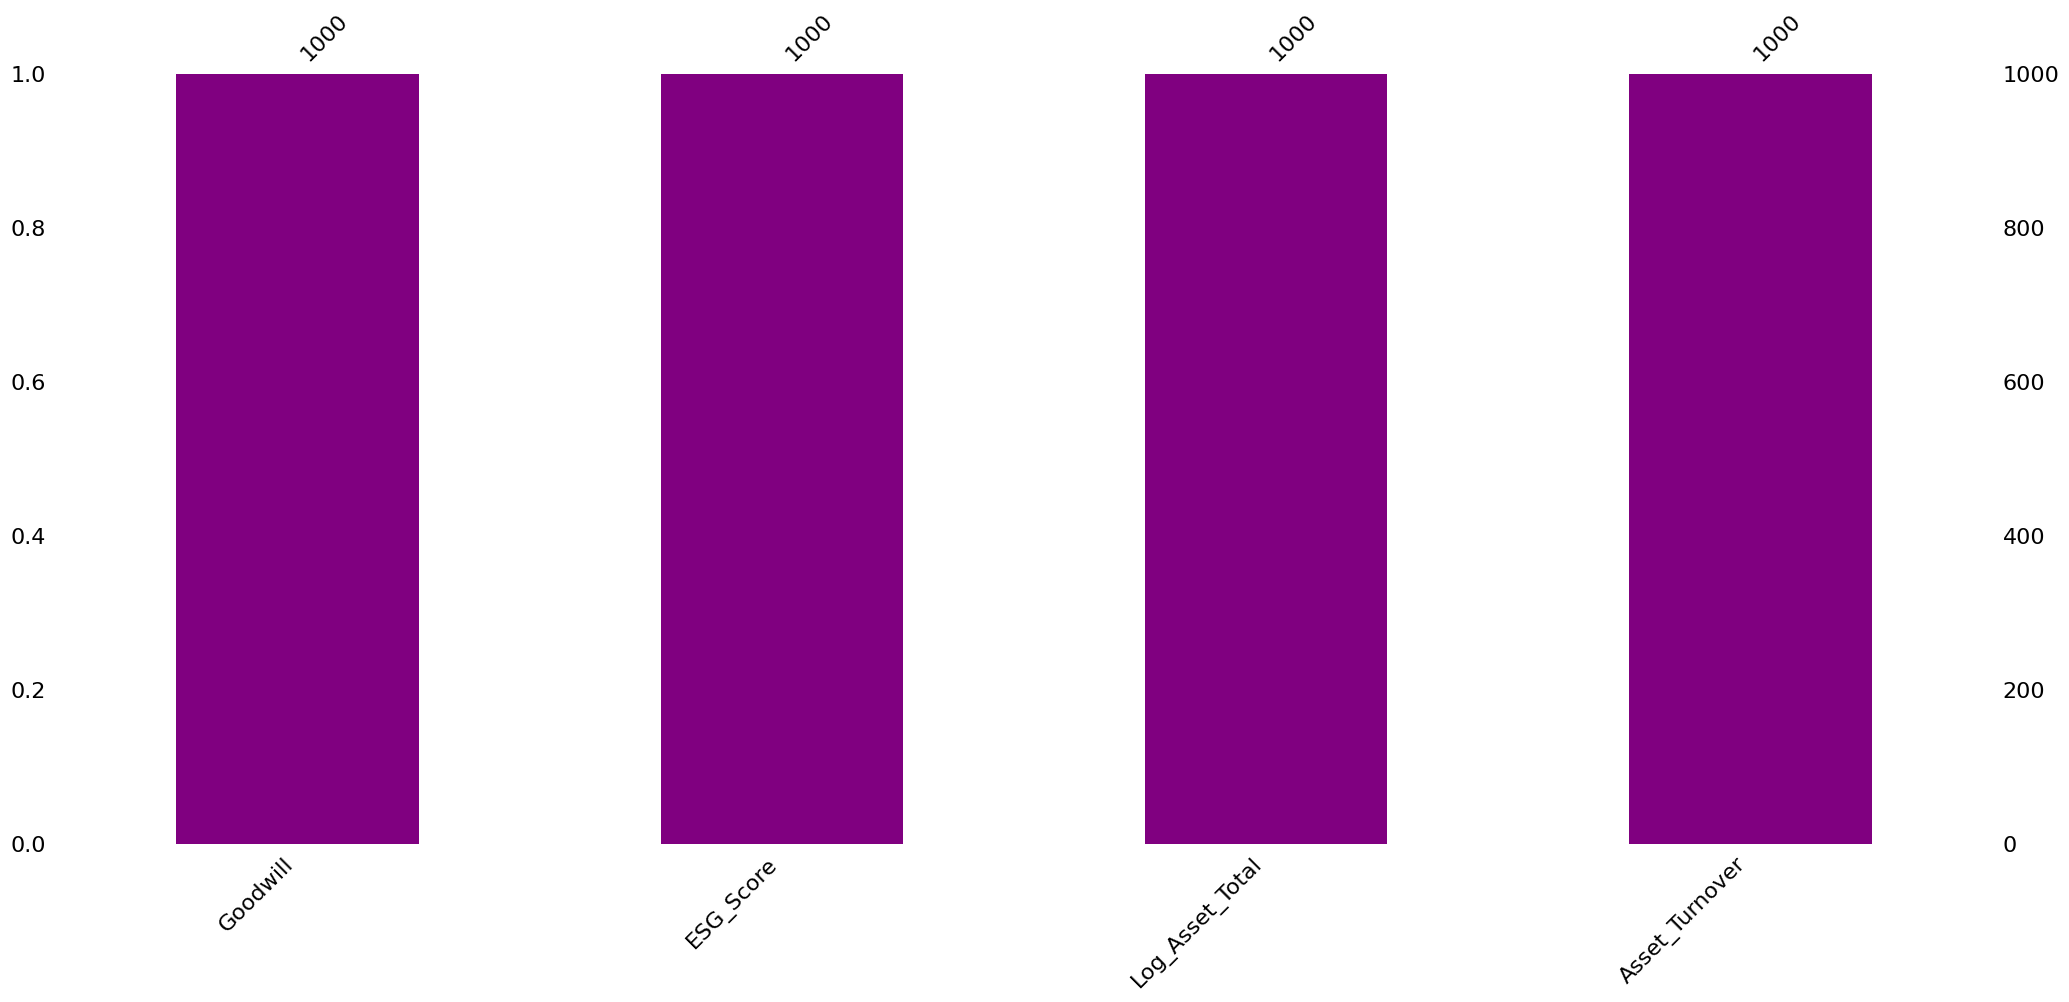

In [4]:
"Exploratory analysis data"

# vérification des données manquantes de notre base de données
msno.bar(esgdata, color ='purple')

- #### **``Checking of duplicates``**

In [5]:
# vérification des doublons dans le jeu de données

dupli= esgdata[esgdata.duplicated()] #affichage des doublons
if not dupli.empty:
    print("There are duplicates in the dataset") 
    dupli.drop_duplicates() # suppression des doublons
else:
    print("There are not duplicates in the dataset")

There are not duplicates in the dataset


- #### **``Checking of outliers``**

In [6]:
# détection des outliers
# détection des outliers avec la méthode iqr
Q1 = esgdata.quantile(0.25)
Q3 = esgdata.quantile(0.75)
IQR = Q3-Q1
outliers=((esgdata<(Q1-1.5*IQR))|(esgdata >(Q3+1.5*IQR)))
valeurs_aberrantes=esgdata[outliers.any(axis=1)]

# affichage des résultats
print("The outliers are: ")
valeurs_aberrantes

The outliers are: 


,Goodwill,ESG_Score,Log_Asset_Total,Asset_Turnover


### Descriptives statistic

In [7]:
# statistique descriptive
print("Descriptive statistics of the dataset")
esgdata.describe()

Descriptive statistics of the dataset


,Goodwill,ESG_Score,Log_Asset_Total,Asset_Turnover
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.571389,50.083716,14.863133,1.021302
std,2.638245,28.917166,2.880714,0.534398
min,1.005974,0.039262,10.002941,0.102248
25%,3.358269,25.088760,12.269836,0.567713
50%,5.704097,50.856415,14.692312,1.001064
75%,7.836155,74.246690,17.342752,1.452354
max,9.991473,99.986663,19.997793,1.999444


### Data visualization

- #### **``Correlation matrix``**

<Axes: >

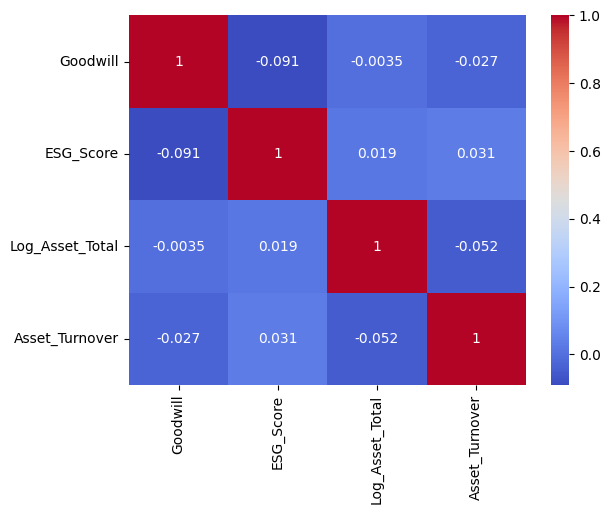

In [8]:
# visualisation des données

# matrice de corrélation
reflet_corr = esgdata.corr()
sns.heatmap( reflet_corr, annot=True, cmap='coolwarm')

The results of our correlation matrix display more or less interesting inferences about the purpose of our study. Indeed, the target variable **(goodwill)** shows a slight positive correlation (0.091) between the predictor **(ESG_score)**.

Additionally, predictors like total assets **(log_asset_total)** and asset turnover **(asset_turnover)** have a slight negative correlation (-0.0035) and (-0.027) with the target variable.

- #### **``visualization of variables``**

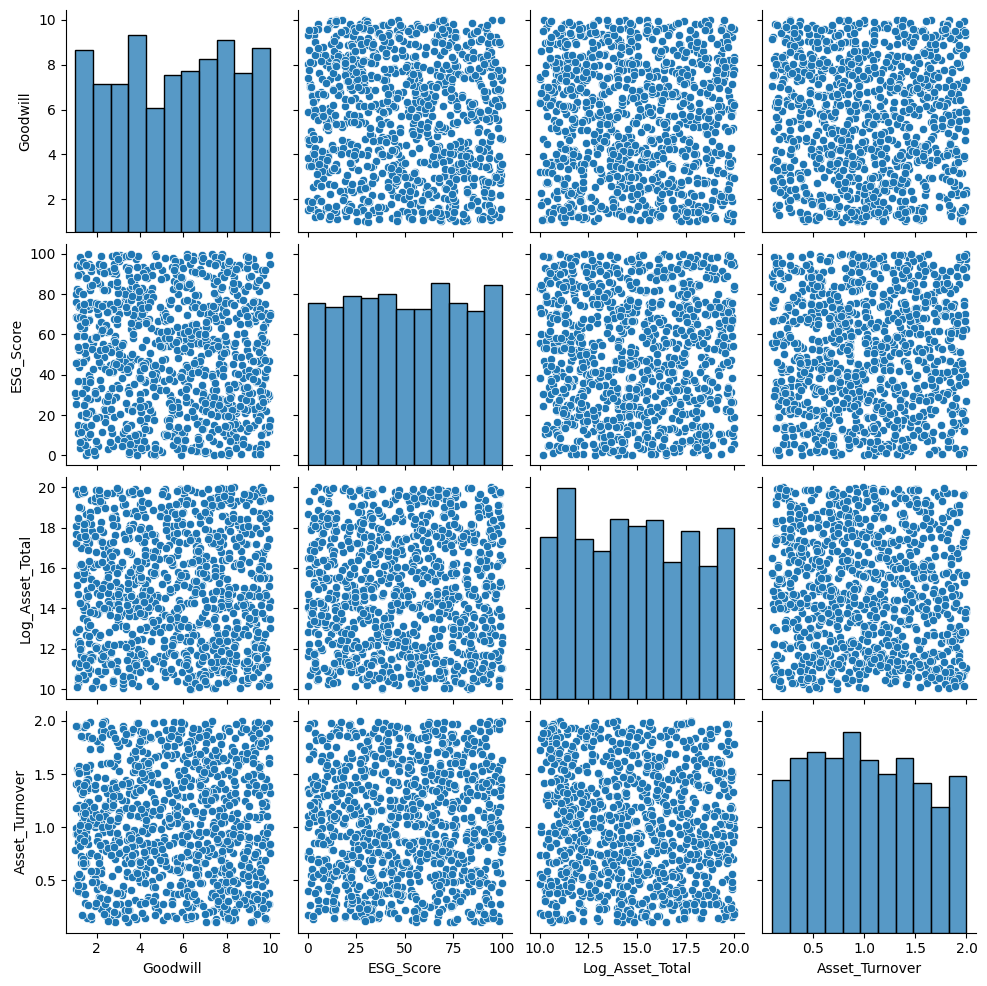

In [9]:
# visualisation des variables d'étude
sns.pairplot(esgdata)

- #### **``Scatterplots and lines regressions of variables``**

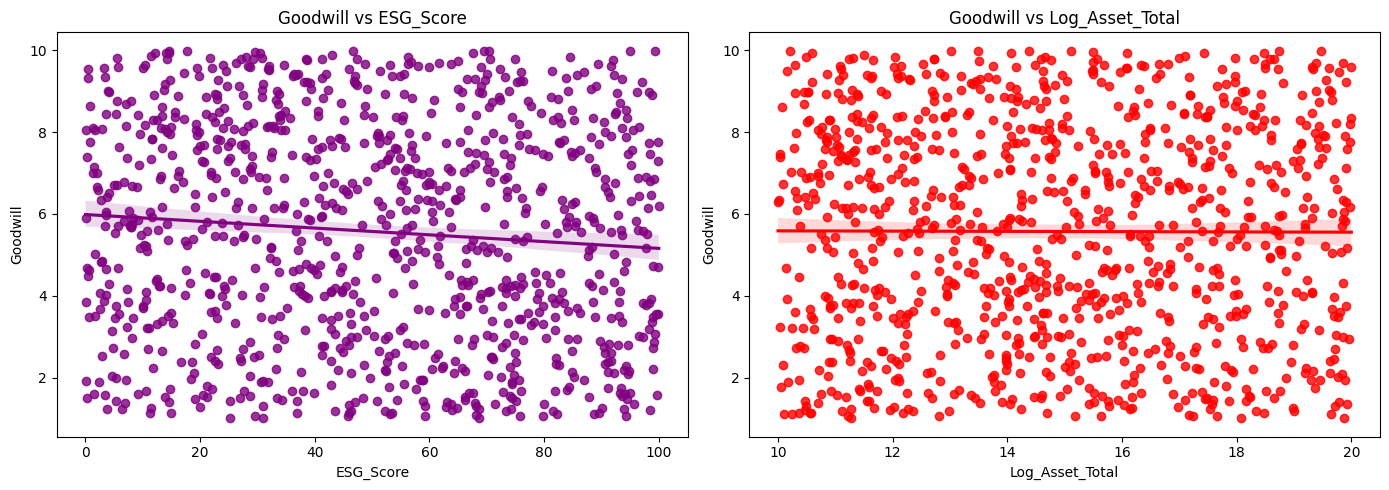

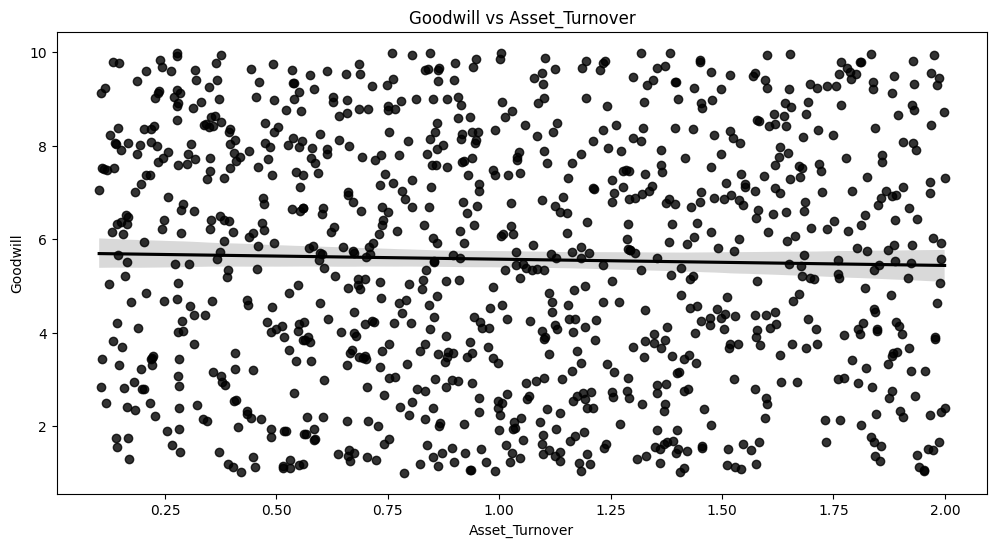

In [12]:
# Création des sous-graphiques
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Premier graphique : Maternal Reflective Functioning vs Prenatal Stress
sns.regplot(data=esgdata, x='ESG_Score', y='Goodwill', color='purple', ax=ax[0])
ax[0].set_title('Goodwill vs ESG_Score')
ax[0].set_xlabel('ESG_Score')
ax[0].set_ylabel('Goodwill')

# Deuxième graphique : Maternal Reflective Functioning vs Social Support
sns.regplot(data=esgdata, x='Log_Asset_Total', y='Goodwill', color='red', ax=ax[1])
ax[1].set_title('Goodwill vs Log_Asset_Total')
ax[1].set_xlabel('Log_Asset_Total')
ax[1].set_ylabel('Goodwill')

# Ajustement de la mise en page et affichage des graphiques
plt.tight_layout()
plt.show()

# Tracer la régression linéaire
plt.figure(figsize=(12, 6))
sns.regplot(data=esgdata, x='Asset_Turnover', y='Goodwill', color='black')
plt.title('Goodwill vs Asset_Turnover')
plt.xlabel('Asset_Turnover')
plt.ylabel('Goodwill')
plt.show()

## Statiscal modeling

Here before starting any modeling in order to respond to our research study, we will go through a normalization of our data for the reduction of result bias and the facilitation of a good fit of our regression model. This phase before modeling allows the data to be transformed to values ​​between 0 and 1.

### Data normalization

In [13]:
# création de variable composite avec nos deux variavles cibles : 

# normalisation des données
minmaxscaler =MinMaxScaler()
esgdatanorma=esgdata.copy()
esgdatanorma[esgdata.columns]=minmaxscaler.fit_transform(esgdata[esgdata.columns])
esgdatanorma

,Goodwill,ESG_Score,Log_Asset_Total,Asset_Turnover
0,0.810549,0.124853,0.089942,0.448436
1,0.606926,0.985737,0.622045,0.776663
2,0.828282,0.053900,0.730912,0.610801
3,0.767141,0.916230,0.406223,0.616700
4,0.934232,0.922228,0.112664,0.787982
...,...,...,...,...
995,0.571549,0.328599,0.118661,0.553546
996,0.315702,0.885143,0.632508,0.243944
997,0.845306,0.242206,0.456746,0.423876
998,0.916286,0.757595,0.504390,0.789451


### Pearson Correlation Analysis

In [15]:
from scipy.stats import pearsonr

# analyse de corrélation de pearson
corr_pearson=esgdatanorma.corr(method= 'pearson')

corr_pearson

,Goodwill,ESG_Score,Log_Asset_Total,Asset_Turnover
Goodwill,1.000000,-0.090742,-0.003479,-0.027111
ESG_Score,-0.090742,1.000000,0.018937,0.030830
Log_Asset_Total,-0.003479,0.018937,1.000000,-0.051649
Asset_Turnover,-0.027111,0.030830,-0.051649,1.000000


The results below present the correlations between the different variables of our study: **Goodwill**, **ESG_Score**, **Log_Asset_Total**, and **Asset_Turnover**. The correlation between Goodwill and ESG scores is -0.090742, indicating a very weak negative relationship. This suggests that higher ESG scores are slightly associated with decreased goodwill, although the effect is small. Additionally, the correlation between Goodwill and the logarithm of total assets (Log_Asset_Total) is -0.003479, which is almost zero. This shows that there is almost no relationship between company size and goodwill valuation.

The correlation between Goodwill and Asset Turnover (Asset_Turnover) is -0.027111, showing a very weak negative relationship. This means that higher asset turnover ratios are slightly associated with decreased goodwill, but again the effect is very small. These preliminary results indicate that the relationships between Goodwill and the other variables studied are weak or non-existent.

To better understand the complex dynamics between ESG scores and goodwill valuation, it would be beneficial to perform more in-depth statistical analyses, such as multiple linear regression and mediation models. These analyzes could provide a more detailed and precise understanding of the interactions between these variables and help identify possible hidden relationships that are not apparent through simple correlation analysis.


### Multiple linear regression

In [16]:
# Définir les variables
X = esgdatanorma[['ESG_Score', 'Log_Asset_Total', 'Asset_Turnover']] # les prédicteurs
Y = esgdatanorma['Goodwill'] #variable cible 

# Ajoutez une constante (intercepte)
X = sm.add_constant(X)

# Modèle de régression
model1 = sm.OLS(Y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               Goodwill   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.959
Date:                Sun, 28 Jul 2024   Prob (F-statistic):             0.0314
Time:                        08:46:54   Log-Likelihood:                -188.50
No. Observations:                1000   AIC:                             385.0
Df Residuals:                     996   BIC:                             404.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5677      0.029     

The multiple linear regression results show the relationships between the dependent variable, **Goodwill**, and the independent variables, **ESG_Score**, **Log_Asset_Total**, and **Asset_Turnover**. The coefficient of determination \(R^2\) is 0.009, which indicates that only 0.9% of the variance of goodwill is explained by the three independent variables. This low \(R^2\) suggests that the variables included in this model do not explain the variation in goodwill well.

The coefficient for **ESG_Score** is -0.0913 with a p-value of 0.004, which is statistically significant at the 1% level. This indicates that there is a negative relationship between ESG scores and goodwill. In other words, a one-unit increase in ESG scores is associated with a 0.0913-unit decrease in goodwill. However, this effect is relatively small.

The coefficient for **Log_Asset_Total** is -0.0031 with a p-value of 0.923, which is not statistically significant. This means that there is insufficient evidence to conclude that there is a relationship between company size (logarithm of total assets) and goodwill. Similarly, the coefficient for **Asset_Turnover** is -0.0255 with a p-value of 0.438, which is also not statistically significant, indicating a lack of significant relationship between asset turnover and goodwill.

### Residuals analysis

Residual analysis indicates that the model may not be a perfect fit. The Omnibus test shows a p-value of 0.000, suggesting that the residuals are not normally distributed. The Durbin-Watson statistic is close to 2 (1.998), suggesting that there is no significant serial correlation in the residuals. However, the Jarque-Bera (JB) test has a p-value of 5.30e-14, indicating that the residuals do not follow a normal distribution. The skewness is -0.059, close to zero, but the kurtosis of 1.794 is less than 3, meaning that the distribution of residuals is platicurtic (flatter than normal).

### Conclusion

In conclusion, although the **ESG_Score** has a significant impact on goodwill, the weakness of the \(R^2\) and the problems with the distribution of the residuals suggest that the regression model might not capture all the dynamics between the variables. It would be useful to explore other potential variables and data transformations to improve the model.